In [8]:
import sys
import os


path_to_src = os.path.abspath(os.path.join("c:\\Users\\user\\OneDrive\\Desktop\\see\\tenx", 'week2', 'src'))


sys.path.append(path_to_src)





In [9]:


try:
    from load_data import load_data_from_postgres, load_data_using_sqlalchemy
    print("Modules imported successfully")
except ModuleNotFoundError as e:
    print(f"ModuleNotFoundError: {e}")




Modules imported successfully


In [11]:

query = "SELECT * FROM xdr_data;"  


df = load_data_from_postgres(query)


if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


<connection object at 0x000001D3B02169B0; dsn: 'user=postgres password=xxx dbname=Tenax host=localhost port=5432', closed: 0>


c:\Users\user\OneDrive\Desktop\see\tenx\week2\src\load_data.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [12]:
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [13]:
sessions_frequency = df.groupby('MSISDN/Number').size()
sessions_frequency

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Length: 106856, dtype: int64

In [15]:
top_20_users = sessions_frequency.nlargest(20)
top_20_users

MSISDN/Number
3.362632e+10    18
3.361489e+10    17
3.362578e+10    17
3.365973e+10    16
3.367588e+10    15
3.376054e+10    15
3.366716e+10    13
3.360313e+10    12
3.360452e+10    12
3.362708e+10    12
3.376041e+10    12
3.378632e+10    12
3.365936e+10    11
3.366471e+10    11
3.366646e+10    11
3.366907e+10    11
3.369879e+10    11
3.362695e+10    10
3.363004e+10    10
3.365826e+10    10
dtype: int64

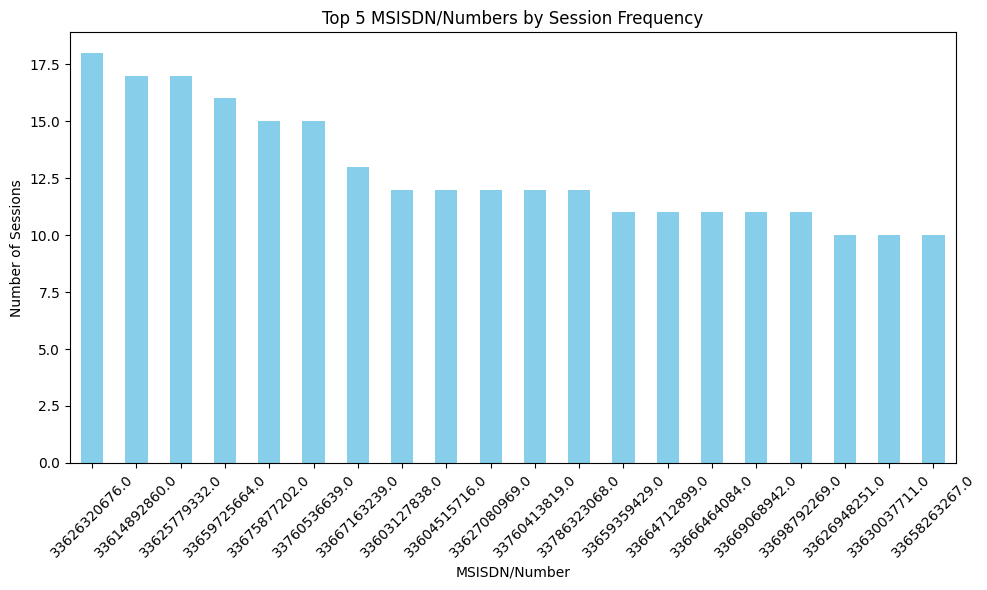

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_20_sessions=sessions_frequency.nlargest(20)
top_20_sessions.plot(kind='bar', color='skyblue')
plt.title('Top 5 MSISDN/Numbers by Session Frequency')
plt.xlabel('MSISDN/Number')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [16]:
average_session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].mean()
total_session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].sum()
total_session_duration

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

In [17]:
average_session_duration

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     18552.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_4828\3259280986.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_session_duration_df.nlargest(10, 'Average Duration (ms)'),


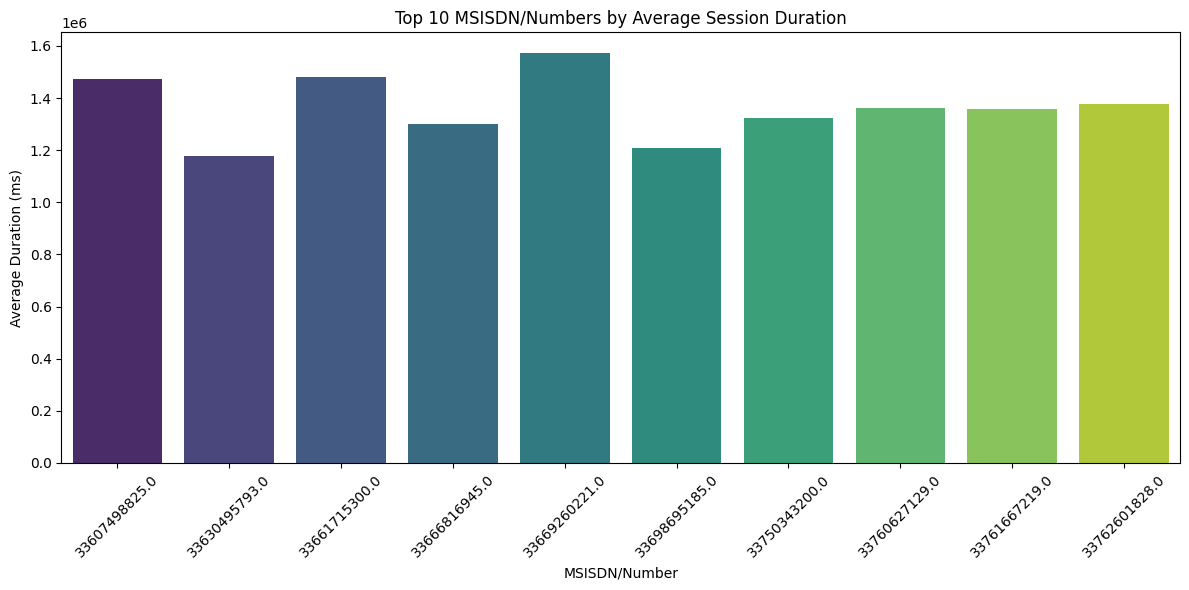

In [24]:
import seaborn as sns

average_session_duration_df = average_session_duration.reset_index()
average_session_duration_df.columns = ['MSISDN/Number', 'Average Duration (ms)']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=average_session_duration_df.nlargest(10, 'Average Duration (ms)'), 
            x='MSISDN/Number', y='Average Duration (ms)', palette='viridis')
plt.title('Top 10 MSISDN/Numbers by Average Session Duration')
plt.xlabel('MSISDN/Number')
plt.ylabel('Average Duration (ms)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [18]:
df['total_traffic'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
total_traffic = df.groupby('MSISDN/Number')['total_traffic'].sum()
total_traffic

MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3.379000e+10    7.146416e+08
3.379000e+10    4.803073e+08
3.197021e+12    2.321240e+08
3.370000e+14    5.962878e+08
8.823971e+14    1.391536e+08
Name: total_traffic, Length: 106856, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_4828\2020916407.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_traffic_df, x='MSISDN/Number', y='Total Traffic (Bytes)', palette='cividis')


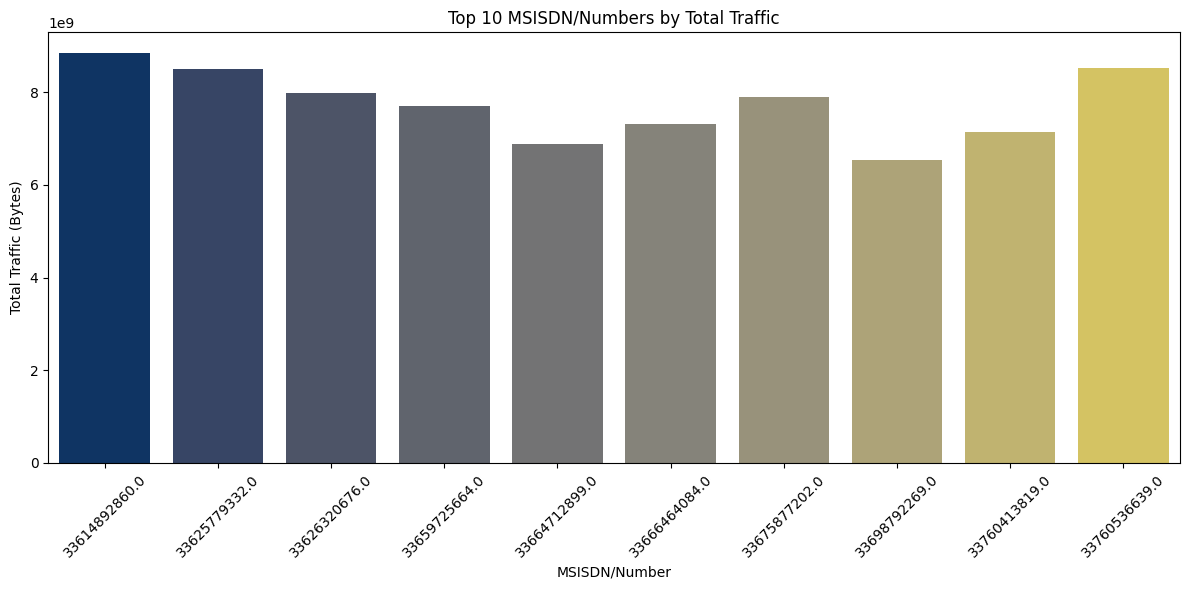

In [26]:
if isinstance(total_traffic, pd.Series):
    total_traffic_df = total_traffic.reset_index()
    total_traffic_df.columns = ['MSISDN/Number', 'Total Traffic (Bytes)']
else:
    raise ValueError("total_traffic is not a Pandas Series.")
top_traffic_df = total_traffic_df.nlargest(10, 'Total Traffic (Bytes)')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_traffic_df, x='MSISDN/Number', y='Total Traffic (Bytes)', palette='cividis')
plt.title('Top 10 MSISDN/Numbers by Total Traffic')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [22]:
import pandas as pd
engagement_metrics = pd.DataFrame({
    'sessions_frequency': sessions_frequency,
    'average_session_duration': average_session_duration,
    'total_session_duration': total_session_duration,
    'total_traffic': total_traffic
})

engagement_metrics.fillna(0, inplace=True)
engagement_metrics

,sessions_frequency,average_session_duration,total_session_duration,total_traffic
MSISDN/Number,,,,
3.360100e+10,1,116720.0,116720.0,8.786906e+08
3.360100e+10,1,181230.0,181230.0,1.568596e+08
3.360100e+10,1,134969.0,134969.0,5.959665e+08
3.360101e+10,1,49878.0,49878.0,4.223207e+08
3.360101e+10,2,18552.0,37104.0,1.457411e+09
...,...,...,...,...
3.379000e+10,1,8810.0,8810.0,7.146416e+08
3.379000e+10,1,140988.0,140988.0,4.803073e+08
3.197021e+12,1,877385.0,877385.0,2.321240e+08


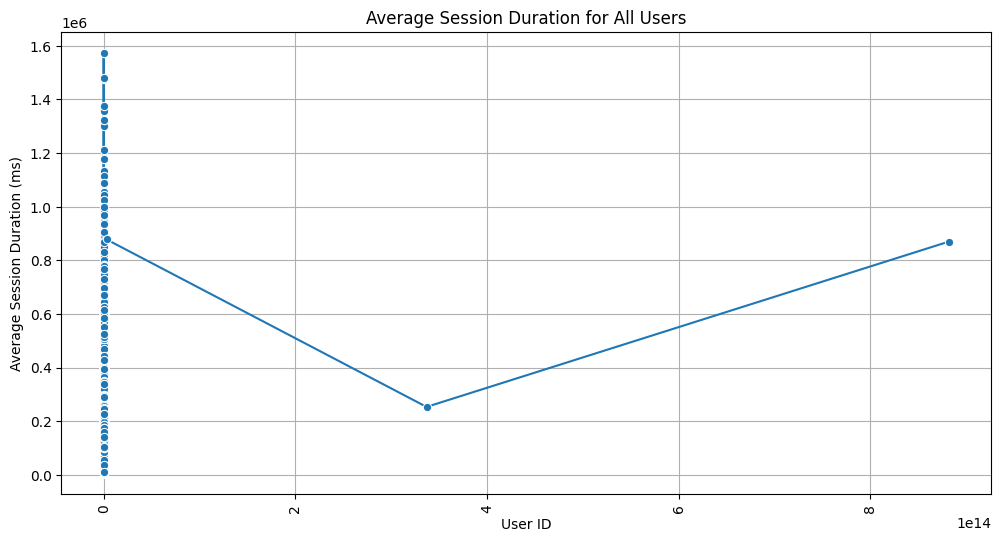

In [27]:
engagement_metrics_sorted = engagement_metrics.sort_values('average_session_duration')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=engagement_metrics_sorted.index, y='average_session_duration', data=engagement_metrics_sorted, marker='o')
plt.title('Average Session Duration for All Users')
plt.xlabel('User ID')
plt.ylabel('Average Session Duration (ms)')
plt.xticks(rotation=90)  # Rotate x labels for better readability if there are many users
plt.grid(True)
plt.show()

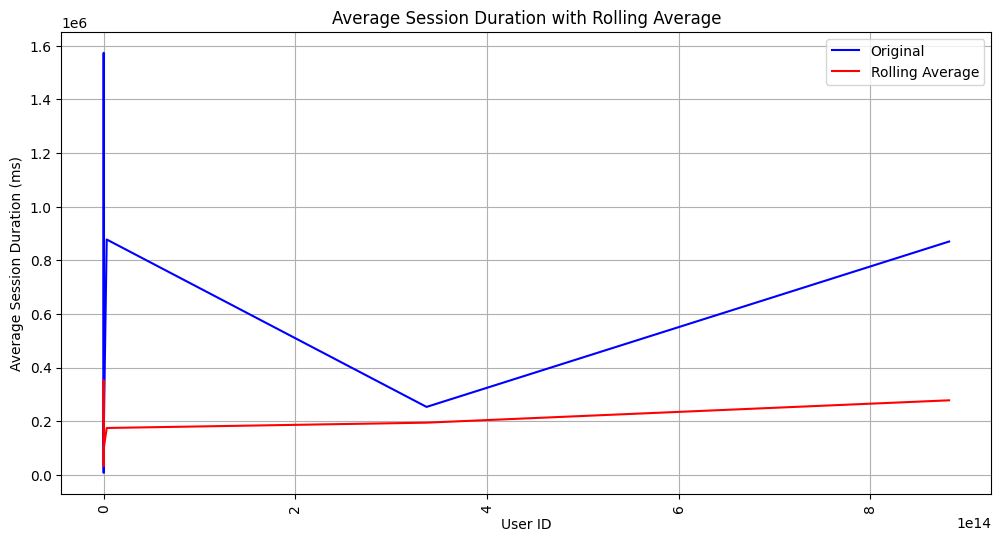

In [29]:
rolling_window = 10  # Adjust window size as needed
engagement_metrics['rolling_avg'] = engagement_metrics['average_session_duration'].rolling(window=rolling_window).mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=engagement_metrics.index, y='average_session_duration', data=engagement_metrics, color='blue', label='Original')
sns.lineplot(x=engagement_metrics.index, y='rolling_avg', data=engagement_metrics, color='red', label='Rolling Average')
plt.title('Average Session Duration with Rolling Average')
plt.xlabel('User ID')
plt.ylabel('Average Session Duration (ms)')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df = pd.DataFrame(data)

# Ensure timestamp is datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Group by day and calculate average session duration
df_daily = df.groupby(df['timestamp'].dt.date).agg({'session_duration': 'mean'}).reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='timestamp', y='session_duration', data=df_daily, marker='o')
plt.title('Average Session Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Average Session Duration (ms)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()